# Multiple linear regression (Medical Expenses)
## About Dataset
##### Content
Health Insurance is medical coverage that helps you meet your medical expenses by offering financial assistance. Due to the high cost of hospitalization expenses, it is important to have a health insurance plan in place. In the current pandemic situation, health insurance plays a vital role in safeguarding your finances.

##### Problem Statement & Objective
Imagine yourself working as a data scientist in an insurance company. Your manager asked you to come up with a data science solution to estimate the medical cost of an individual who has bought health insurance in the institution. Build a machine learning model to estimate the medical cost of an individual.

##### Variables
The train dataset contains seven variables including the target variable i.e. charges. These variables are:

age: age of primary beneficiary. (if the age is given in decimal, consider it as the nearest integer, for example, if age = 19.1, it's nearest integer is 19, if age = 22.6, it's nearest integer is 23)\
sex: insurance contractor gender, female, male\
bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,\
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9\
children: Number of children covered by health insurance / Number of dependents\
smoker: Smoking\
region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.\
charges: Individual medical costs billed by health insurance\

##### where to get the dataset
url = https://www.kaggle.com/datasets/gauravduttakiit/medical-insurance-cost?resource=download

### Import packages and load dataset

In [1]:
# import packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import math

%matplotlib inline
np.random.seed(42)

In [61]:
# import insurance dataset 
# we have 3630 rows and 6 columns of data
df = pd.read_csv('insurance.csv', usecols = ['age','sex','bmi','children','smoker','charges'])
df

,age,sex,bmi,smoker,children,charges
0,21.000000,male,25.745000,no,2,3279.868550
1,36.976978,female,25.744165,yes,3,21454.494239
2,18.000000,male,30.030000,no,1,1720.353700
3,37.000000,male,30.676891,no,3,6801.437542
4,58.000000,male,32.010000,no,1,11946.625900
...,...,...,...,...,...,...
3625,48.820767,female,41.426984,no,4,10987.324964
3626,38.661977,female,26.202557,no,2,11735.844352
3627,56.000000,male,40.300000,no,0,10602.385000
3628,48.061207,female,34.930624,no,1,8976.140452


In [12]:
# see top 5 rows
df.head()

,age,sex,bmi,smoker,children,charges
0,21.000000,male,25.745000,no,2,3279.868550
1,36.976978,female,25.744165,yes,3,21454.494239
2,18.000000,male,30.030000,no,1,1720.353700
3,37.000000,male,30.676891,no,3,6801.437542
4,58.000000,male,32.010000,no,1,11946.625900


In [13]:
# the data info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3630 entries, 0 to 3629
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       3630 non-null   float64
 1   sex       3630 non-null   object 
 2   bmi       3630 non-null   float64
 3   smoker    3630 non-null   object 
 4   children  3630 non-null   int64  
 5   charges   3630 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 170.3+ KB


### Plot dataset (Histogram and scatter plots)

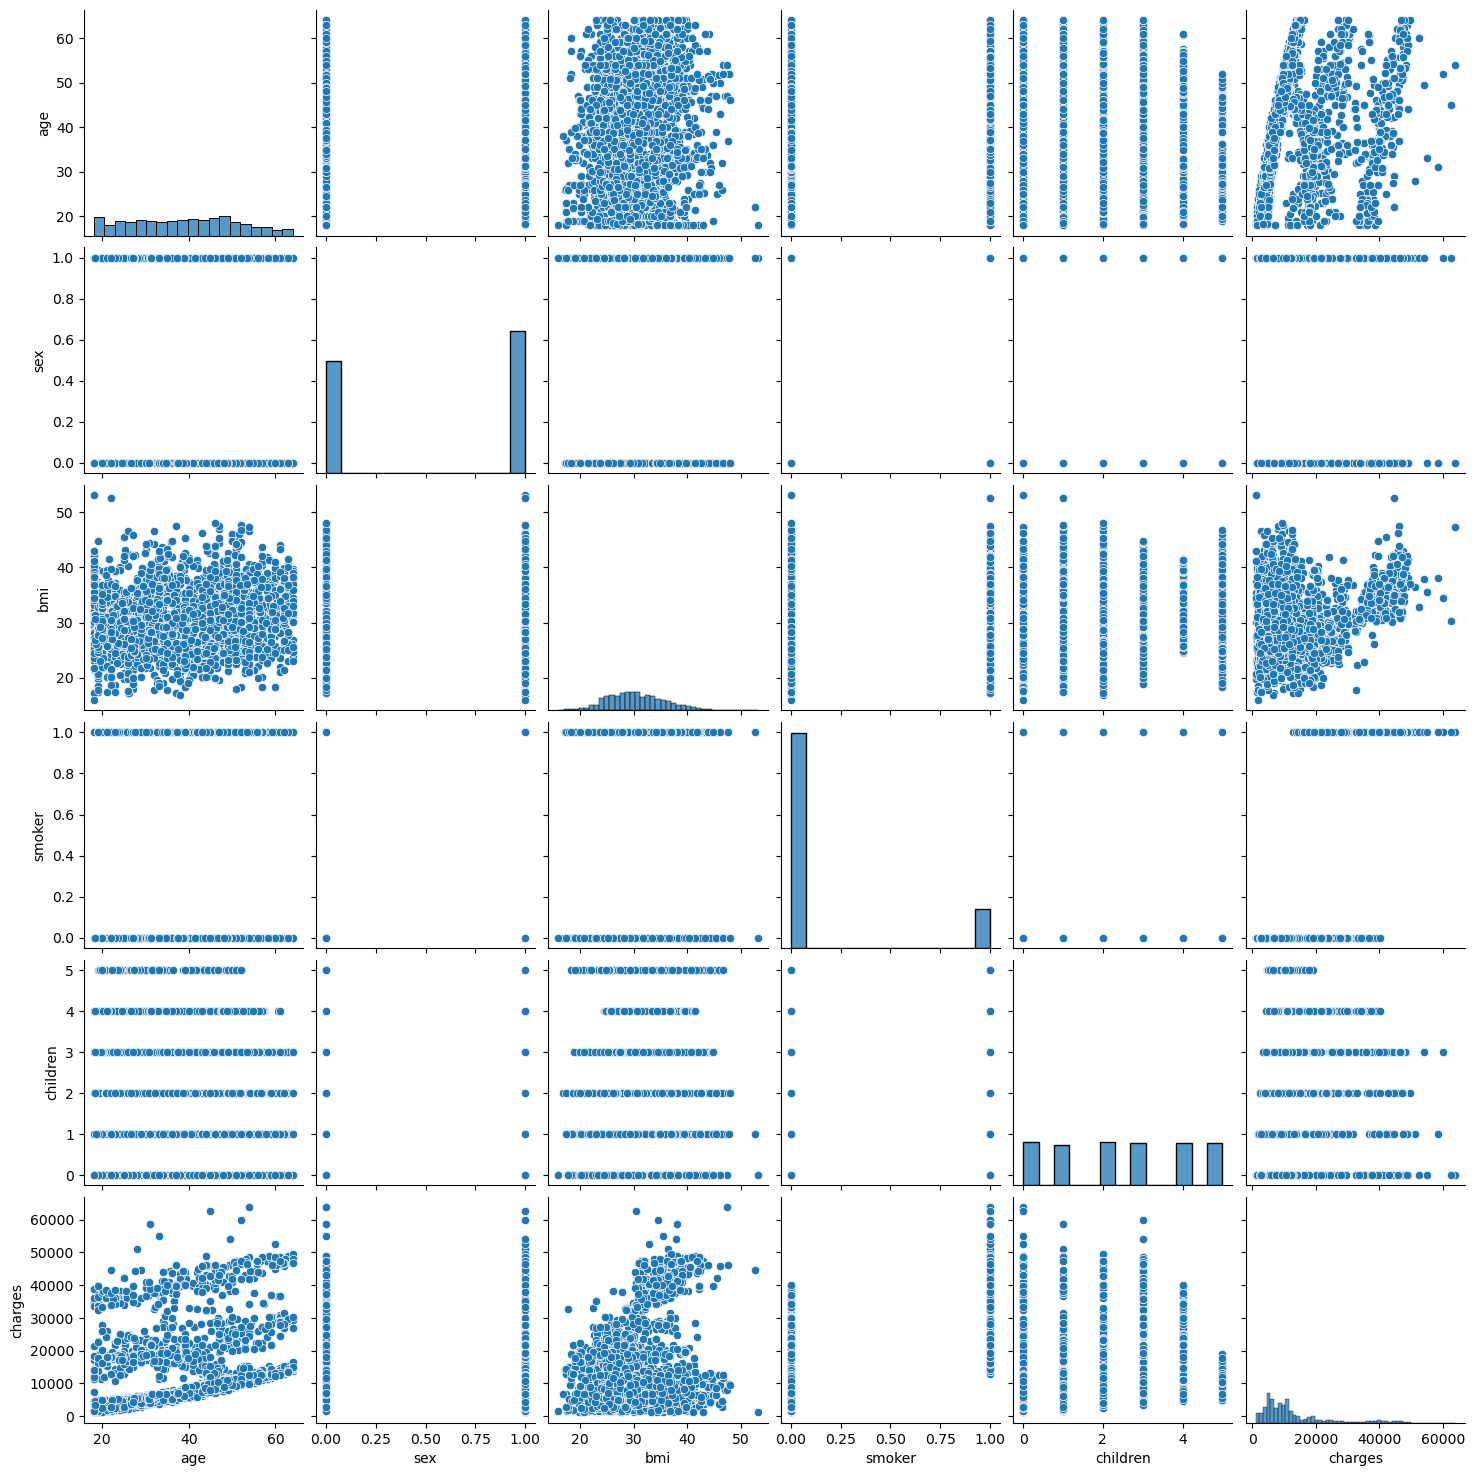

In [6]:
# seaborn pairplot
# Plot pairwise relationships in a dataset.

# By default, this function will create a grid of Axes such that each numeric variable in data 
# will by shared across the y-axes across a single row and the x-axes across a single column.

# The diagonal plots are treated differently: a univariate distribution plot is drawn 
# to show the marginal distribution of the data in each column.
sns.pairplot(df)

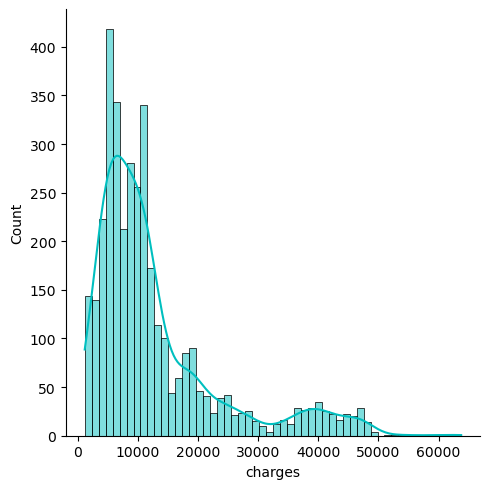

In [7]:
# the price vary greatly making it hard to do linear regression
sns.displot(df['charges'], kde = True, color = 'c')

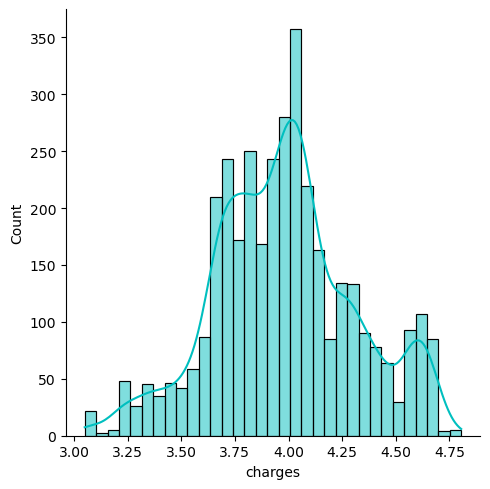

In [8]:
# the price vary greatly making it hard to do linear regression
sns.displot(np.log10(df['charges']), kde = True, color = 'c')

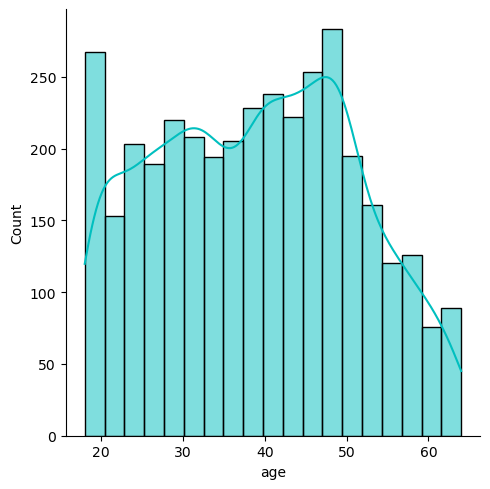

In [9]:
# distribution of age
sns.displot(df['age'], kde = True, color = 'c')

male      2029
female    1601
Name: sex, dtype: int64


<BarContainer object of 2 artists>

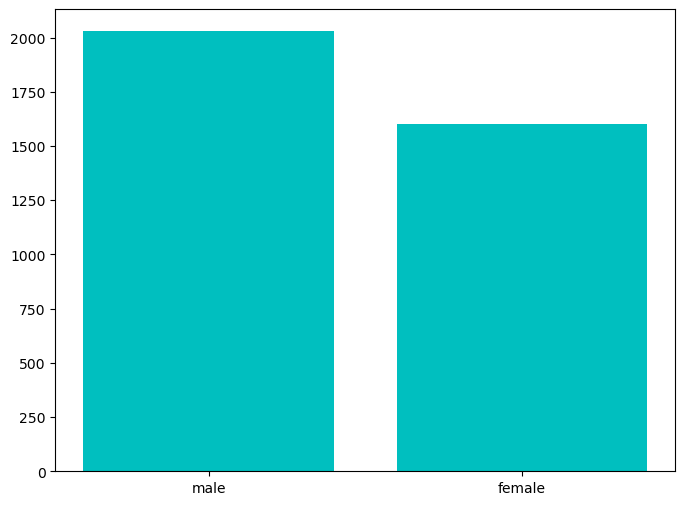

In [14]:
# barplot for the number of patients based on sex
print(df['sex'].value_counts())
plt.figure(figsize = (8,6))
plt.bar(df['sex'].unique(), df['sex'].value_counts(), color = 'c')

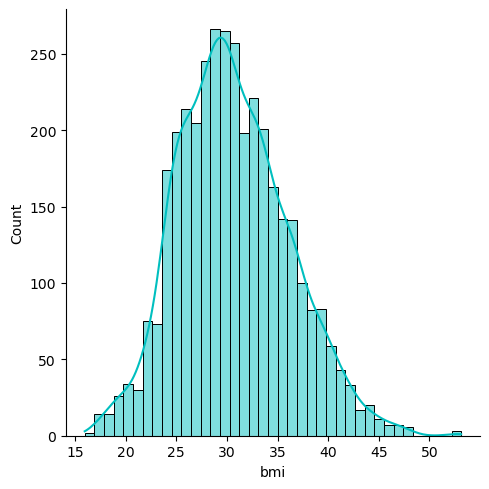

In [15]:
# distribution of bmi
sns.displot(df['bmi'], kde = True, color = 'c')

no     3070
yes     560
Name: smoker, dtype: int64


<BarContainer object of 2 artists>

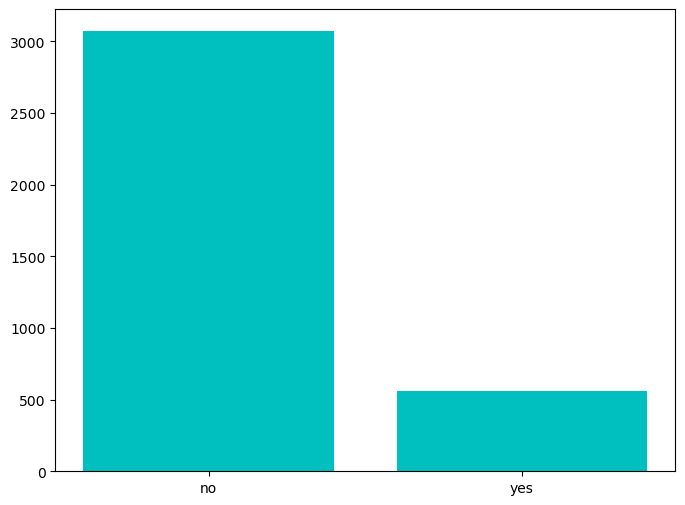

In [16]:
# barplot for the number of patients based on sex
print(df['smoker'].value_counts())
plt.figure(figsize = (8,6))
plt.bar(df['smoker'].unique(), df['smoker'].value_counts(), color = 'c')

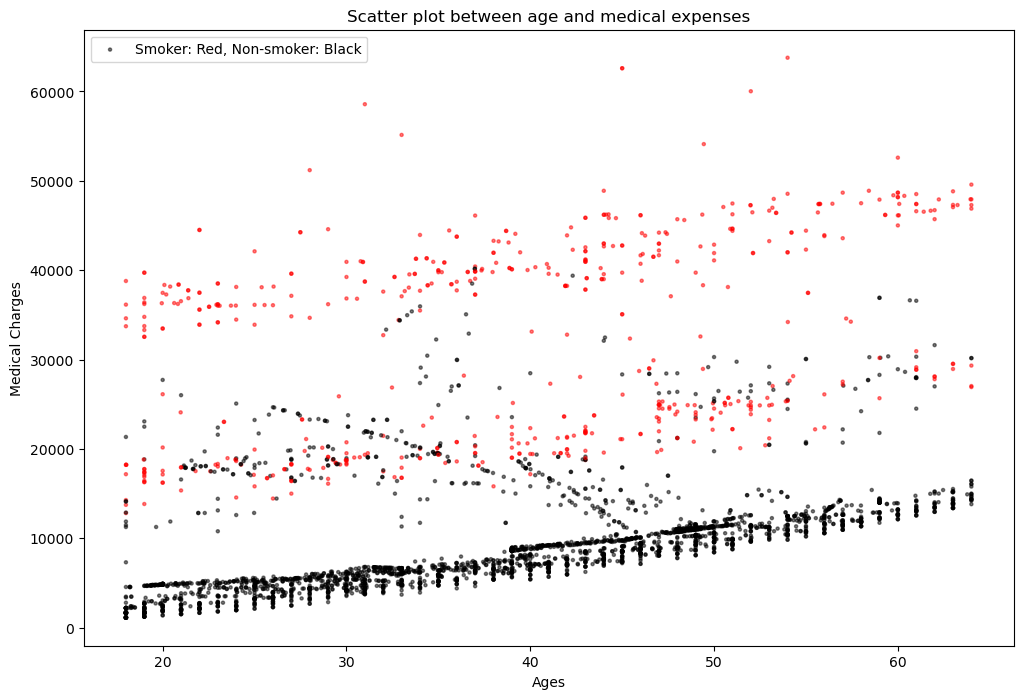

In [63]:
# scatter plot between age and medical expenses
# the color of plots is based on smoker(red) and non-smoker(black)

# notice that the medical expenses for smoker is higher across all patient's ages
plt.figure(figsize = (12,8))
colors = {'yes': 'red', 'no': 'black'}
plt.scatter(df['age'],df['charges'], color = df['smoker'].map(colors),s = 5, alpha = 0.5, label = 'Smoker: Red, Non-smoker: Black')
plt.xlabel('Ages')
plt.ylabel('Medical Charges')
plt.title('Scatter plot between age and medical expenses')
plt.legend()

### Descriptive statistics
mean, min, max, percentile and standard deviation

In [66]:
# change categorical value to numerical value 
df['sex'] = df['sex'] .astype('category')
df['sex'] = df['sex'] .cat.codes

df['smoker'] = df['smoker'] .astype('category')
df['smoker'] = df['smoker'] .cat.codes

In [67]:
# view the binary dataset
df.head()

,age,sex,bmi,smoker,children,charges
0,21.000000,1,25.745000,0,2,3279.868550
1,36.976978,0,25.744165,1,3,21454.494239
2,18.000000,1,30.030000,0,1,1720.353700
3,37.000000,1,30.676891,0,3,6801.437542
4,58.000000,1,32.010000,0,1,11946.625900


In [68]:
# describe data
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,3630.0,38.887036,12.151029,18.0000,29.000000,39.170922,48.343281,64.00000
sex,3630.0,0.558953,0.496581,0.0000,0.000000,1.000000,1.000000,1.00000
bmi,3630.0,30.629652,5.441307,15.9600,26.694526,30.200000,34.100000,53.13000
smoker,3630.0,0.154270,0.361257,0.0000,0.000000,0.000000,0.000000,1.00000
children,3630.0,2.503581,1.712568,0.0000,1.000000,3.000000,4.000000,5.00000
charges,3630.0,12784.808644,10746.166743,1121.8739,5654.818262,9443.807222,14680.407505,63770.42801


### Correlation heatmap

In [69]:
# set independent and dependent variable
# according to the correation data, ages, sex, bmi, and smoker is a good indicator to patient's medical expenses
X = df[['age','sex','bmi','smoker',]]
X = sm.add_constant(X)
y = df['charges']

<Axes: >

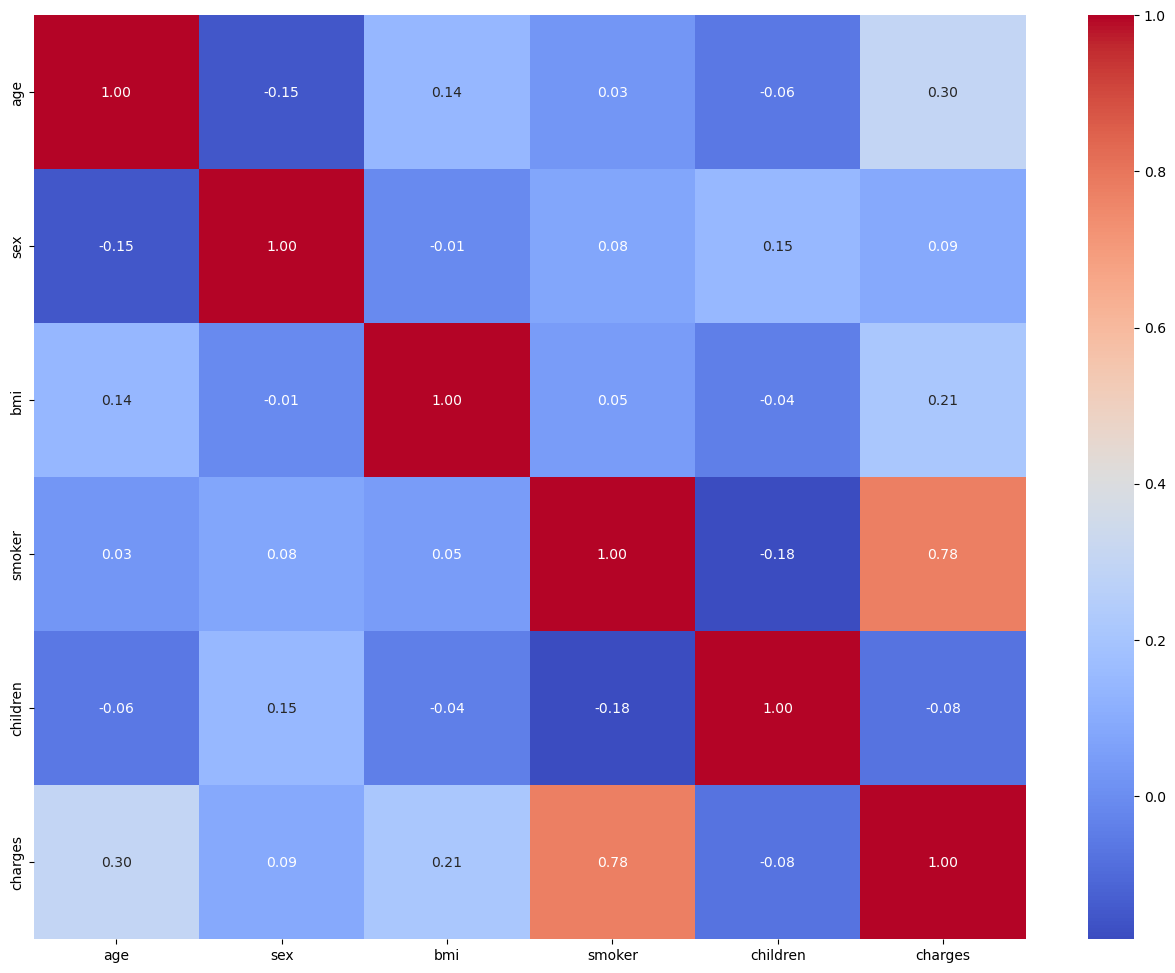

In [70]:
# seaborn heatmap
plt.figure(figsize = (16,12))
sns.heatmap(data = df.corr(), annot = True, fmt = '.2f', cmap = 'coolwarm')

### Multiple linear regression analysis 

In [71]:
# use statsmodels OLS to fit multiple linear model 
model = sm.OLS(y,X).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.706
Model:                            OLS   Adj. R-squared:                  0.706
Method:                 Least Squares   F-statistic:                     2181.
Date:                Sun, 24 Sep 2023   Prob (F-statistic):               0.00
Time:                        13:39:48   Log-Likelihood:                -36620.
No. Observations:                3630   AIC:                         7.325e+04
Df Residuals:                    3625   BIC:                         7.328e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9322.6834    619.299    -15.054      0.000   -1.05e+04   -8108.473
age          239.9872      8.141     29.478      0.000     224.025     255.949
sex         1652.6446    197.737      8.358      0.000    1264.957    2040.332
bmi          273.4145     17.974     15.212      0.000     238.174     308.655
smoker      2.254e+04    268.941     83.799      0.000     2.2e+04    2.31e+04
==============================================================================
Omnibus:                      923.987   Durbin-Watson:                   2.014
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2536.539
Skew:                           1.340   Prob(JB):                         0.00
Kurtosis:                       6.096   Cond. No.                         326.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
# meaning behind the regression model
print('Regression model accuracy based on r-squared is ', model.rsquared)
print('Regression model parameter:\n', model.params)
print('Regression model standard error is ', model.scale**0.5)

# model equation
print(f'Regression Model is y = {model.params.age}X1 + {model.params.sex}X2 + {model.params.bmi}X3 + {model.params.smoker}X4 {model.params.const} ')


Regression model accuracy based on r-squared is  0.7064710310364049
Regression model parameter:
 const     -9322.683379
age         239.987156
sex        1652.644601
bmi         273.414469
smoker    22536.865506
dtype: float64
Regression model standard error is  5825.303245776699
Regression Model is y = 239.9871564853015X1 + 1652.644600640812X2 + 273.41446901834405X3 + 22536.865505705202X4 -9322.683379310445 


In [73]:
# specific meaning of each independent variables increases

print(f'For every 1 year increase in patient age, the medical expenses will increase ${round(model.params.age)}')
print(f'For every 1 digit increase in patient bmi, the medical expenses will increase ${round(model.params.bmi)}')
print(f'For male patient, the medical expenses will increase ${round(model.params.sex)}')
print(f'For smoker patient, the medical expenses will increase ${round(model.params.smoker)}')

For every 1 year increase in patient age, the medical expenses will increase $240
For every 1 digit increase in patient bmi, the medical expenses will increase $273
For male patient, the medical expenses will increase $1653
For smoker patient, the medical expenses will increase $22537


In [75]:
# predict the medical expenses of random patient A
# patient A: age = 30, bmi = 20, male = yes, smoker = yes
# the predicted medical expenses for random patient A is around $27500
random_patient = [30,1,20,1]
X_ = [1,30,1,20,1]
model.predict(X_)

array([27534.73080196])

### Plot the real value vs predicted value

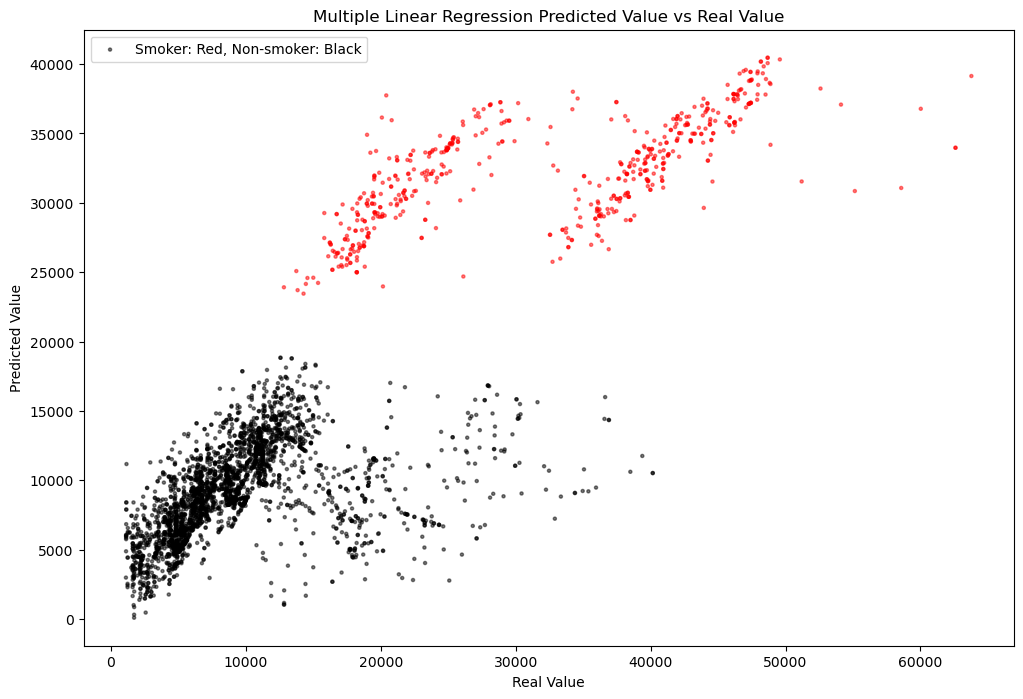

In [76]:
# plot the predicted value and real value using seaborn regression plot
# plot based on smoker or non smoker

df = pd.read_csv('insurance.csv', usecols = ['age','sex','bmi','children','smoker','charges'])

plt.figure(figsize = (12,8))
colors = {'yes': 'red', 'no': 'black'}
plt.scatter(y,model.predict(), color = df['smoker'].map(colors),s = 5, alpha = 0.5, label = 'Smoker: Red, Non-smoker: Black')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Multiple Linear Regression Predicted Value vs Real Value')
plt.legend()

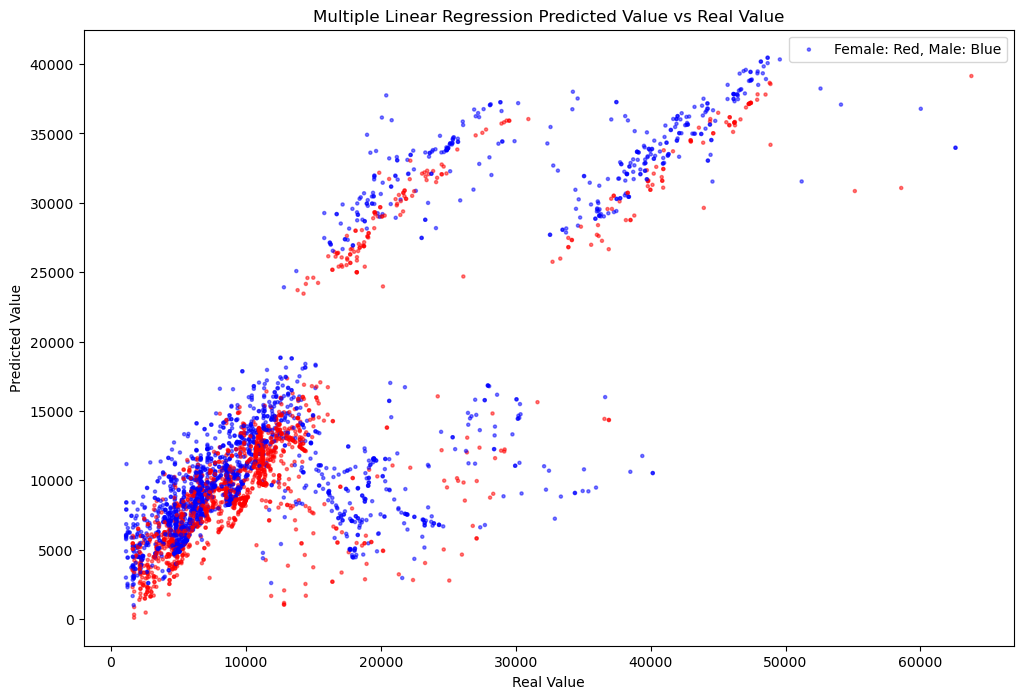

In [77]:
# plot the predicted value and real value using seaborn regression plot
# plot based on sex
df = pd.read_csv('insurance.csv', usecols = ['age','sex','bmi','children','smoker','charges'])

plt.figure(figsize = (12,8))
colors = {'female': 'red', 'male': 'blue'}
plt.scatter(y,model.predict(), color = df['sex'].map(colors),s = 5, alpha = 0.5, label = 'Female: Red, Male: Blue')
plt.xlabel('Real Value')
plt.ylabel('Predicted Value')
plt.title('Multiple Linear Regression Predicted Value vs Real Value')
plt.legend()